## Abstract
   We will examine the USD/TRY currency taked from Borsa Istanbul. Our aim is to determine whether there is a difference on the interval which is before crisis and after crisis. To do this, we will divide all dataset into three part, then consider each part on itself. We encourage to the log return anlaysis for further the statistical tests and calculations. We build a new dataset which consist of weekly log return data. We introduce to ARIMA model for the log return dataset. After appling ARIMA model to detect deterministic part of log return set, the residuals of ARIMA model generally have the normal distribution with mean zero and constant variance. If not, we we may use Johnson transformation to satisfy normality. We will use the R programming language for all application progresses.

## Application on USD-TRY Currency
### Description of Data

The data used in this analysis is daily closing prices of the USD-TRY currency from Borsa Istanbul between october 1997 and november 2018. 

Dataset is stored in a excel (xlsx) file. The package __readx1__ is used for reading dataset from excel file. The package __repr__ is used for resizing plots for better visualization.

In [3]:
library(repr)
library(readxl)
historicalset <- read_excel("USDTRY_Historical_Data.xlsx", skip = 3, col_types = c("date", "numeric"), col_names = c("Dates","Close_Price"))
head(historicalset,2)
tail(historicalset,2)
summary(historicalset)

Dates,Close_Price
1997-10-20,0.1808
1997-10-21,0.1813


Dates,Close_Price
2018-11-19,5.3125
2018-11-20,5.3871


     Dates                      Close_Price    
 Min.   :1997-10-20 00:00:00   Min.   :0.1808  
 1st Qu.:2003-02-07 00:00:00   1st Qu.:1.3212  
 Median :2008-05-14 00:00:00   Median :1.5123  
 Mean   :2008-05-12 22:52:28   Mean   :1.7428  
 3rd Qu.:2013-08-15 00:00:00   3rd Qu.:1.9491  
 Max.   :2018-11-20 00:00:00   Max.   :6.8838  

# Preparing Dataset
Instead of using the daily closing prices, we will investigate the closing price of the first and last day of weekly by using __log return__ analysis. 

### Log Returns Analysis
Instead of closing price series, log returns will be used for further statistical tests and calculations.

Advantage of returns compared to closing prices is normalization and it enables evaluation of analytic relationships among variables despite originating from price series of varied values by measuring all variables in a comparable metric.

$$ R_t = \frac{P_t - P_{t-1}}{P_{t-1}} $$

The Taylor expansion for $ \log{(1+x)} $ is $ x-\frac{x^2}{2}+\frac{x^3}{3} + O(x^4) $ 

When x is a small number, $ \log{(1+x)} \approx x $ 

Substituting $ R_t $ gives us $ \log{(1+R_t)} \approx R_t $

\begin{align}
\log{(1 + R_t)}= & \log{1+\frac{P_t}{P_{t-1}-1}} \approx R_t \\
= & \log{\frac{P_t}{P_{t-1}}} = =\log{P_t} - \log{P_{t-1}} \approx R_t
\end{align}

<table>
    <tr>
        <td> $R_t$ = Returns at t</td>
        <td> $P_t$ = Closing price at t</td>
    </tr>
</table>



Now we are going to save our dataset *logReturn* as a new time series by using **xts** code in the *quantmod* package. By the way, The *lubridate* package is usefull to get weekly data set.

In [4]:
library(lubridate)
library(quantmod)
data.xts <- xts(historicalset$Close_Price, order.by = as.Date(historicalset$Dates))
weeklydata <- to.weekly(data.xts, name = "W")
head(weeklydata,5)
logReturn <- as.xts(log(weeklydata$W.Close)-log(weeklydata$W.Open))
dimnames(logReturn)[2] <- "LogReturn"
head(logReturn)

           W.Open W.High  W.Low W.Close
1997-10-24 0.1808 0.1826 0.1808  0.1826
1997-10-31 0.1828 0.1828 0.1816  0.1821
1997-11-07 0.1839 0.1840 0.1832  0.1832
1997-11-14 0.1851 0.1875 0.1851  0.1875
1997-11-21 0.1889 0.1911 0.1889  0.1906

              LogReturn
1997-10-24  0.009906520
1997-10-31 -0.003836672
1997-11-07 -0.003813679
1997-11-14  0.012882626
1997-11-21  0.008959217
1997-11-28  0.022751757

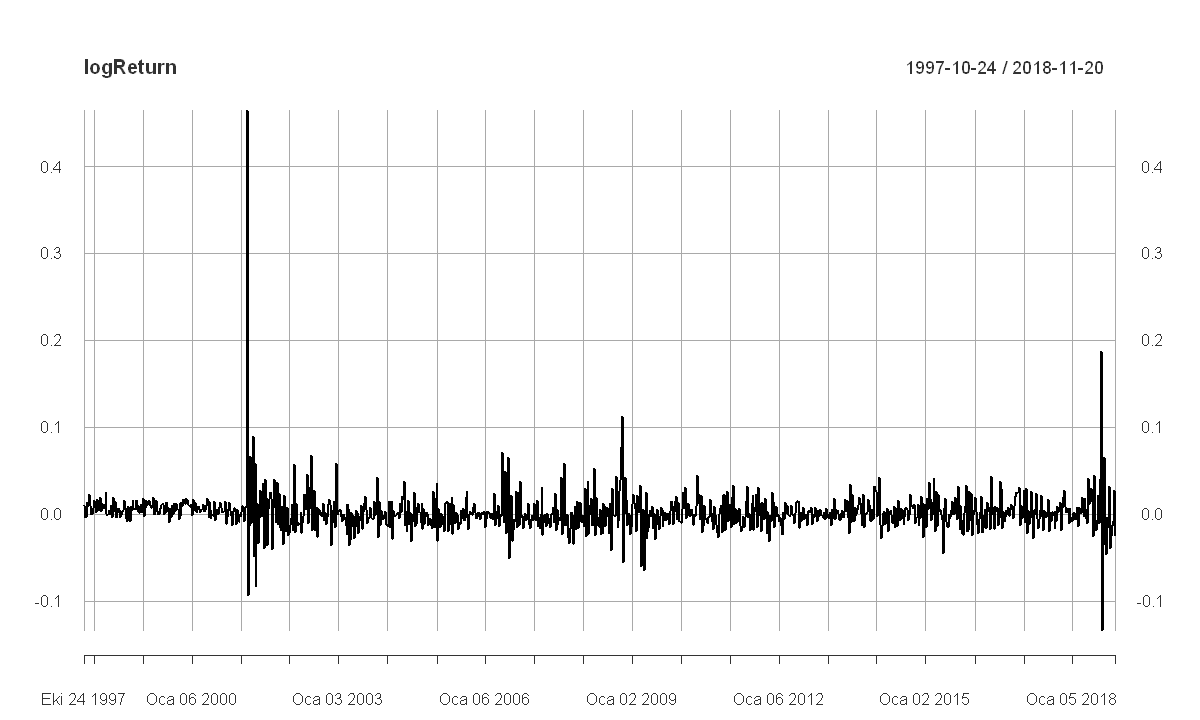

In [5]:
options(repr.plot.width = 10, repr.plot.height = 6)
plot(logReturn)

## Split logReturn dataset into three part
As we see on the above figure of logReturn dataset, there are jumps on the around 2001, 2009 and 2018. And also, roughly there is  difference variation between on the time interval 1998-2002,2002-2012 and 2012-2018. So we can divide all risk dataset as time series into three different time interval

In [6]:
Part1 <- window(logReturn, start= "1997-10-24", end ="2000-10-30")
Part2 <- window(logReturn, start= "2000-10-30", end ="2009-12-31")
Part3 <- window(logReturn, start= "2010-01-01", end ="2018-07-20")

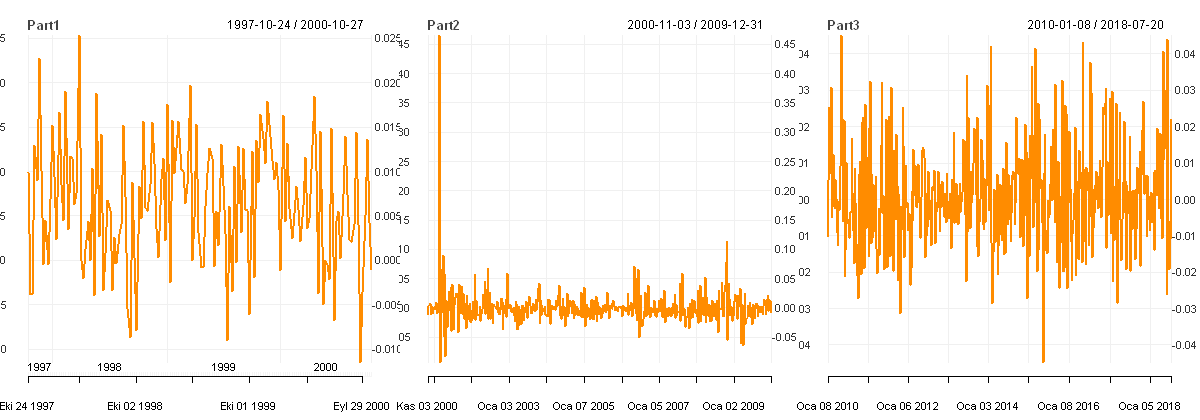

In [7]:
options(repr.plot.width = 10, repr.plot.height = 3.5)
par(mfrow=c(1,3))
chart_Series(Part1)
chart_Series(Part2)
chart_Series(Part3)

# To test our datasets whether to be stationary or not 

Generally, a p-value of less than 0.05 means you can reject the null hypothesis that there is a unit root of a univariate time series ( non-stationary time series ). And You can accept the alternative hypothesis that  the time series is stationary. The ADF statistic is negative number. If the test statistic of adf.test is more negative than the its table value, we can reject the null hypothesis. The more negative test statistic means that there is  the stronger the evidence for rejecting the null hypothesis. 

<img src="https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2016/06/df-critical.png">
The table is taken from the website https://www.statisticshowto.datasciencecentral.com/adf-augmented-dickey-fuller-test/

In [9]:
library(tseries)
adf.test(Part1)
adf.test(Part2)
adf.test(Part3)


	Augmented Dickey-Fuller Test

data:  Part1
Dickey-Fuller = -3.849, Lag order = 5, p-value = 0.01846
alternative hypothesis: stationary


Warning message in adf.test(Part2):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  Part2
Dickey-Fuller = -7.5361, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(Part3):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  Part3
Dickey-Fuller = -7.2207, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


- For the Part1 dataset, The test statistic is -3.849 which less than the value of table with the p-value 0.018. This means that There is an enough evidence to reject the null hypothesis, and so We can accept the our dataset is **stationary**.
- For the Part2 dataset, The test statistic is -7.5361 with the p-value less than 0.01. This means that There is an enough evidence to reject the null hypothesis, and so We can accept the our dataset is **stationary**.
- For the Part3 dataset, The test statistic is -7.2207 with the p-value less than 0.01. This means that There is an enough evidence to reject the null hypothesis, and so We can accept the our dataset is **stationary**.

Also, Test statistic Dickey-Fuller is less than the critical value corresponding to statistically significane of level **-2.88**. So we reject to the null hypothesis and accept to alternative haypothesis, that is Our dataset is stationary. 

( Fuller, W. A. (1976). Introduction to Statistical Time Series. New York: John Wiley and Sons. )

## Moving Average Processes MA(q)

$\{X_t\}$ is a moving average process of order q if 
\begin{equation}
X_t=Z_t+\theta_1 Z_{t-1}+\cdots+\theta_q Z_{t-q}
\end{equation}
where
\begin{equation}
Z_t\sim WN(0,\sigma^2)
\end{equation}
and $\theta_1,\dots,\theta_q$ are constants.

Or we can rewrite the above definition as operotor

\begin{equation}
X_t=\theta(B)Z_t \qquad \mbox{where}\quad \theta(B)= 1+\theta_1 B+ \theta_2 B^2 + \cdots + \theta_q B^q
\end{equation}

the shift operator $B^k Z_t = Z_{t-k}$.
 
Generally, we choose the model with $|\theta|<1$

## Autoregressive Processes AR(p)

An autoregressive process of order p is 

\begin{equation}
X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots + \phi_p X_{t-p} + Z_t
\end{equation}

where $\{Z_t\} \sim WN(0,\sigma^2)$ and $Z_t$ is uncorrelated with $X_s$ for each $ s<t $.


If E$(X_t)=\mu \neq 0$, then we replace $X_t$ by $X_t - \mu$ then we obtain

\begin{equation}
X_t-\mu = \phi_1 (X_{t-1}-\mu) + \phi_2 (X_{t-2}-\mu) + \cdots + \phi_p (X_{t-p}-\mu) + Z_t
\end{equation}

then we have 

\begin{equation}
X_t = \alpha + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots + \phi_p X_{t-p} + Z_t
\end{equation}

where  $\alpha = \mu(1-\phi_1-\cdots-\phi_p)$.

Writing the model in the other form

\begin{equation}
X_t - \phi_1 X_{t-1} - \phi_2 X_{t-2} - \cdots - \phi_p X_{t-p} = Z_t
\end{equation}

Apllying the shift operator $BX_t=X_{t-1}$

\begin{equation}
\underbrace{(1- \phi_1 B + \phi_2 B^2 - \cdots - \phi_p B^p)}_ {\mbox{autoregressive operator } \phi(B)} X_t = Z_t
\end{equation}

## Autoregressive Integrated Moving Average Process ARIMA(p,d,q)

A process $\{X_t\}$ is said to follow an Integrated ARMA model, denoted by **ARIMA(p,d,q)**, if

\begin{equation}
\nabla ^d X_t = (1-B)^d X_t
\end{equation}

is ARMA(p,q). We write model with integration parameter $d$ is a nonnegative integer as

\begin{equation}
\phi(B)(1-B)^d X_t = \theta(B)Z_t, \qquad Z_t \sim WN(0,\sigma^2).
\end{equation}



## Auto.ARIMA 
To determine the deterministic part of each of the datasets, We will utilize the ARIMA model.  Auto.arima model returns best ARIMA model according to either AIC, AICc or BIC value.
Auto ARIMA takes into account the AIC and BIC values generated (as you can see in the code) to determine the best combination of parameters. AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) values are estimators to compare models. The lower these values, the better is the model.

In [10]:
library(forecast)
Model1 <- auto.arima(Part1)
Model2 <- auto.arima(Part2)
Model3 <- auto.arima(Part3)
summary(Model1)
print("##################################################################################")
summary(Model2)
print("##################################################################################")
summary(Model3)

Series: Part1 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
        mean
      0.0064
s.e.  0.0006

sigma^2 estimated as 4.842e-05:  log likelihood=554.12
AIC=-1104.23   AICc=-1104.15   BIC=-1098.13

Training set error measures:
                       ME        RMSE         MAE  MPE MAPE      MASE      ACF1
Training set 2.057467e-18 0.006936449 0.005659155 -Inf  Inf 0.7048782 0.0129284
[1] "##################################################################################"
Series: Part2 
ARIMA(2,0,2) with zero mean 

Coefficients:
         ar1      ar2      ma1     ma2
      1.1558  -0.5156  -1.3168  0.7290
s.e.  0.1176   0.1277   0.0944  0.1035

sigma^2 estimated as 0.0008454:  log likelihood=1012.61
AIC=-2015.21   AICc=-2015.08   BIC=-1994.37

Training set error measures:
                       ME      RMSE        MAE MPE MAPE      MASE        ACF1
Training set 0.0007971769 0.0289535 0.01487014 NaN  Inf 0.6197023 -0.03299916
[1] "###################################################

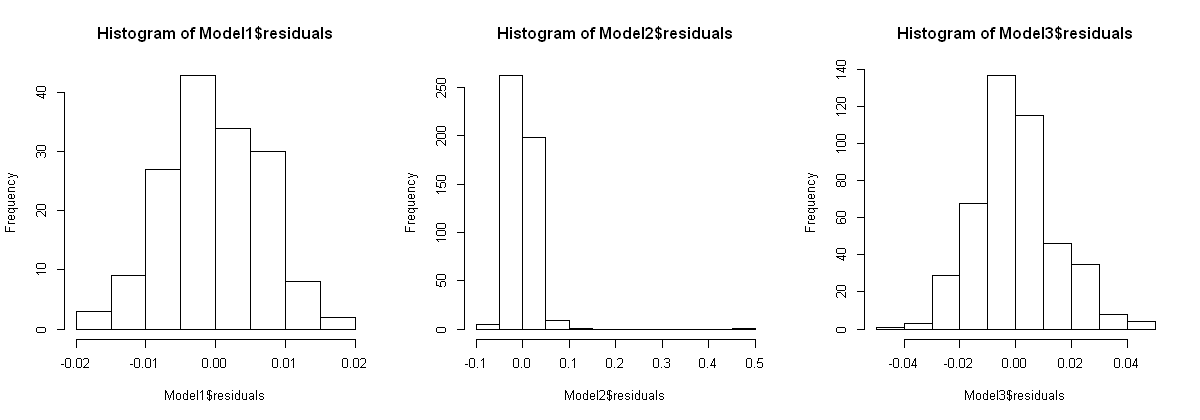

In [11]:
options(repr.plot.width = 10, repr.plot.height = 3.5)
par(mfrow=c(1,3))
hist(Model1$residuals)
hist(Model2$residuals)
hist(Model3$residuals)

In [12]:
cat(sprintf("Length of residuals of Model1: %d\n", length(Model1$residuals)))
cat(sprintf("Length of residuals of Model2: %d\n", length(Model2$residuals)))
cat(sprintf("Length of residuals of Model3: %d\n", length(Model3$residuals)))
#wd <- getwd()
#message(sprintf("Current working dir: %s\n", wd))

Length of residuals of Model1: 156
Length of residuals of Model2: 477
Length of residuals of Model3: 446


# To test normality Shapiro.test()

The Shapiro-Wilk test is a test of normality with the null hypothesis is that the data came from a normally distributed population.

**Properties of the test statistic W ** 

The value of test statistic W is between 0 and 1. W is a very similar to the correlation coefficient of a normal probability plot. 
* If p value greater than 0.05 then we have failure to reject the null hypothesis that is **not proof* that the distribution is Normal. It means that the data does not give enough evidence to reject the assumption of normality

**Kolmogorov-Smirnov test**

The Kolmogorov–Smirnov test is a nonparametric test of the equality of continuous, one-dimensional probability distributions that can be used to compare a sample with a reference probability distribution, or to compare two samples.

The D statistic is the absolute max distance (supremum) between the CDFs of the two samples. The closer this number is to 0 the more likely it is that the two samples were drawn from the same distribution.

In [13]:
set.seed(5-3-2019)
ks.test(Model1$residuals,pnorm)
ks.test(Model2$residuals,pnorm)
ks.test(Model3$residuals,pnorm)

Warning message in ks.test(Model1$residuals, pnorm):
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  Model1$residuals
D = 0.49286, p-value < 2.2e-16
alternative hypothesis: two-sided



	One-sample Kolmogorov-Smirnov test

data:  Model2$residuals
D = 0.47425, p-value < 2.2e-16
alternative hypothesis: two-sided


Warning message in ks.test(Model3$residuals, pnorm):
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  Model3$residuals
D = 0.48461, p-value < 2.2e-16
alternative hypothesis: two-sided


We can not say anything about normality. Because, The test statistic 0 $\leq $ D $\leq$ 1. When D is closer 0, the difference between the emprical cumulative distribution of dataset and normal distribution is so. 

In [14]:
shapiro.test(Model1$residuals)
shapiro.test(Model2$residuals)
shapiro.test(Model3$residuals)


	Shapiro-Wilk normality test

data:  Model1$residuals
W = 0.99576, p-value = 0.9367



	Shapiro-Wilk normality test

data:  Model2$residuals
W = 0.57069, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  Model3$residuals
W = 0.98654, p-value = 0.0003825


- For the case Part1, Since p-value is equal to 0.9367 and the value of test statistic is W =0.99576, we definitely say that we are not rely on our test. It can be form normal distribution or not.

- For the case Part2, Since p-value is equal to approximately 0 and the value of test statistic is W =0.57069, we may say that it is not from normal distiribution.

- For the last one, Since p-value is approximately 0.0004 and the test statistic W = .98654 is closer than the others, we can conclude that it's distiribution is from normal distiribution.

## Johnson Tranformation

In [16]:
library(Johnson)
Johndata1 <- RE.Johnson(Model1$residuals)
Johndata2 <- RE.Johnson(Model2$residuals)
Johndata3 <- RE.Johnson(Model3$residuals)

In [17]:
shapiro.test(Johndata1$transformed)
shapiro.test(Johndata2$transformed)
shapiro.test(Johndata3$transformed)


	Shapiro-Wilk normality test

data:  Johndata1$transformed
W = 0.99595, p-value = 0.9488



	Shapiro-Wilk normality test

data:  Johndata2$transformed
W = 0.99559, p-value = 0.2



	Shapiro-Wilk normality test

data:  Johndata3$transformed
W = 0.9958, p-value = 0.2813


In [18]:
ks.test(Johndata1$transformed,pnorm)
ks.test(Johndata2$transformed,pnorm)
ks.test(Johndata3$transformed,pnorm)

Warning message in ks.test(Johndata1$transformed, pnorm):
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  Johndata1$transformed
D = 0.038735, p-value = 0.9734
alternative hypothesis: two-sided



	One-sample Kolmogorov-Smirnov test

data:  Johndata2$transformed
D = 0.02357, p-value = 0.9537
alternative hypothesis: two-sided


Warning message in ks.test(Johndata3$transformed, pnorm):
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  Johndata3$transformed
D = 0.028814, p-value = 0.8528
alternative hypothesis: two-sided


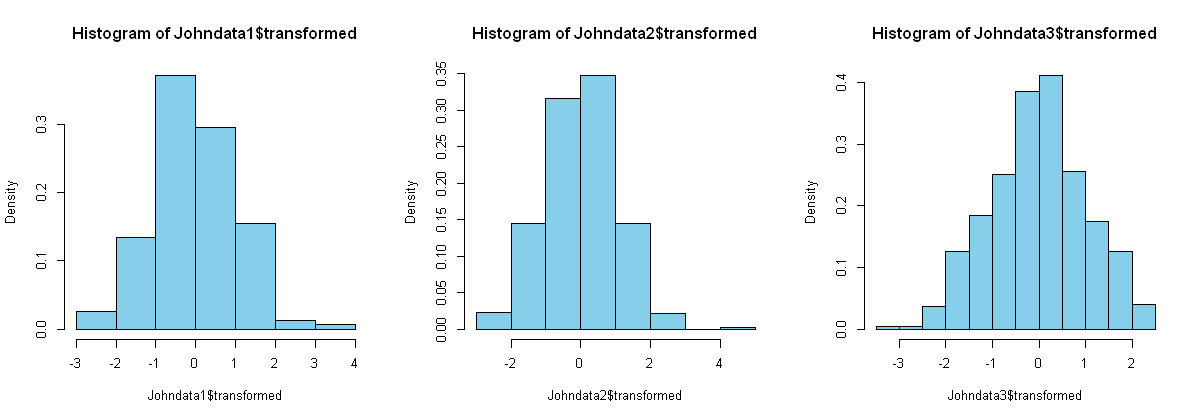

In [19]:
par(mfrow=c(1,3))
hist(Johndata1$transformed, probability = T, col = "skyblue")
hist(Johndata2$transformed, probability = T, col = "skyblue")
hist(Johndata3$transformed, probability = T, col = "skyblue")

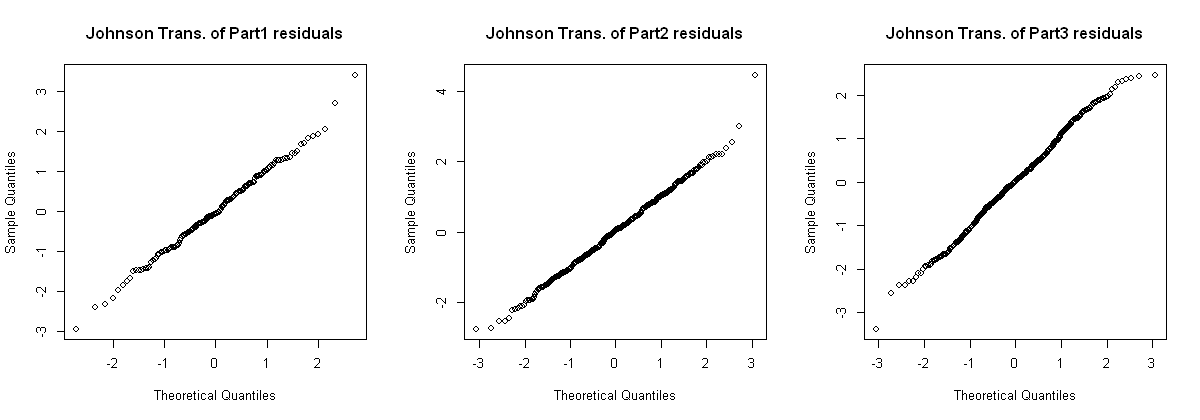

In [20]:
par(mfrow=c(1,3))
qqnorm(Johndata1$transformed, main ="Johnson Trans. of Part1 residuals")
qqnorm(Johndata2$transformed, main ="Johnson Trans. of Part2 residuals")
qqnorm(Johndata3$transformed, main ="Johnson Trans. of Part3 residuals")

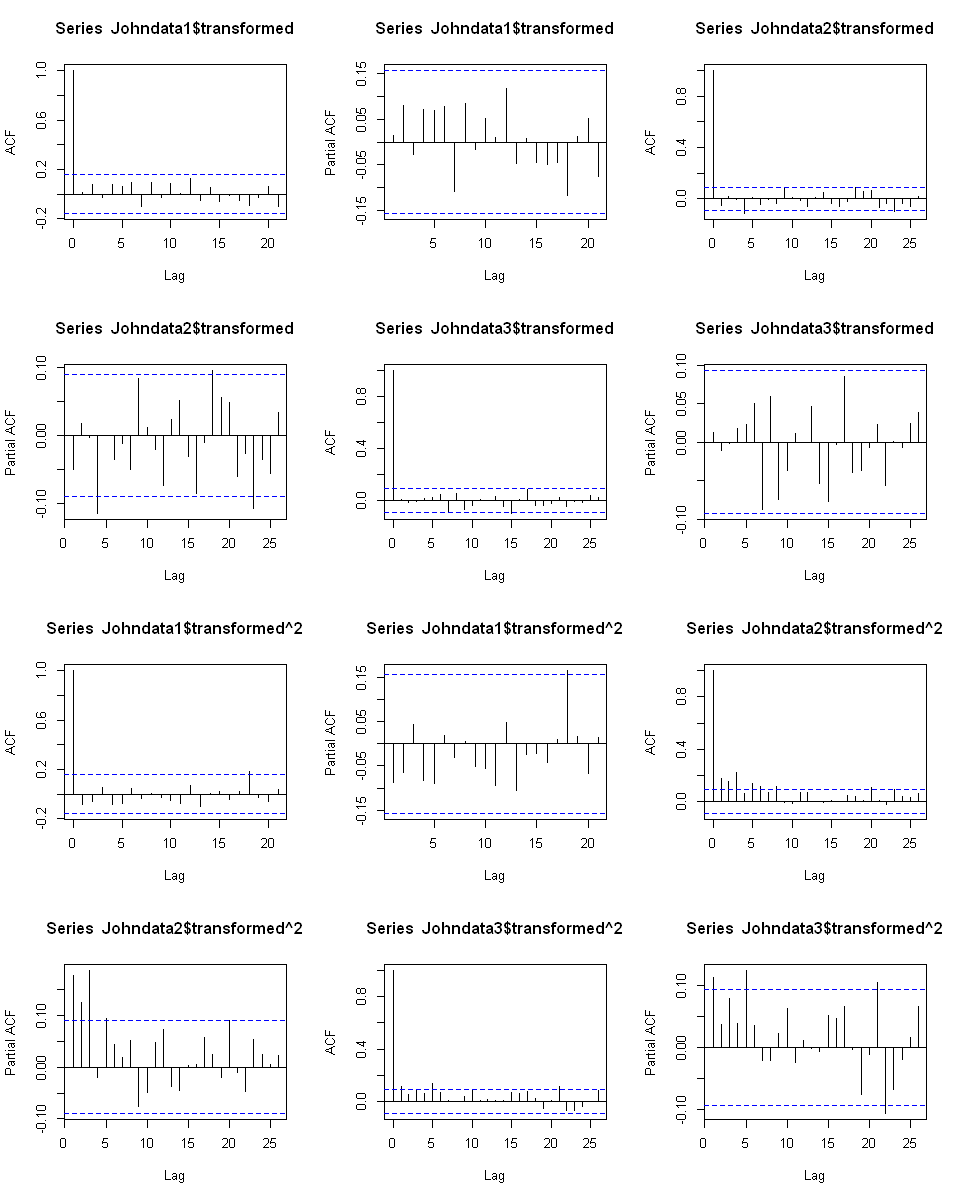

In [21]:
options(repr.plot.width = 8, repr.plot.height = 10)
par(mfrow=c(4,3))
acf(Johndata1$transformed)
pacf(Johndata1$transformed)
acf(Johndata2$transformed)
pacf(Johndata2$transformed)
acf(Johndata3$transformed)
pacf(Johndata3$transformed)
acf(Johndata1$transformed^2)
pacf(Johndata1$transformed^2)
acf(Johndata2$transformed^2)
pacf(Johndata2$transformed^2)
acf(Johndata3$transformed^2)
pacf(Johndata3$transformed^2)

In [23]:
#install.packages("MTS", repos= "https://cran.us.r-project.org")
library(MTS)
archTest(coredata(Johndata1$transformed))
archTest(coredata(Johndata2$transformed))
archTest(coredata(Johndata3$transformed))

Q(m) of squared series(LM test):  
Test statistic:  5.586858  p-value:  0.848698 
Rank-based Test:  
Test statistic:  13.2239  p-value:  0.2114214 
Q(m) of squared series(LM test):  
Test statistic:  78.06744  p-value:  1.199596e-12 
Rank-based Test:  
Test statistic:  43.23623  p-value:  4.511919e-06 
Q(m) of squared series(LM test):  
Test statistic:  26.2342  p-value:  0.003437649 
Rank-based Test:  
Test statistic:  25.78999  p-value:  0.004033142 


### archTest says that the dataset transformed from Model2residuals and Model3residuals have conditionally heteroscedasticity in the variance process.

# Apply to orginal data without splitting

# Stationary

In [24]:
adf.test(logReturn)

Warning message in adf.test(logReturn):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  logReturn
Dickey-Fuller = -9.8881, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary


In [25]:
full.model <- auto.arima(logReturn)
summary(full.model)

Series: logReturn 
ARIMA(0,1,3) 

Coefficients:
          ma1     ma2      ma3
      -1.1481  0.2179  -0.0607
s.e.   0.0306  0.0464   0.0283

sigma^2 estimated as 0.0005287:  log likelihood=2579.03
AIC=-5150.07   AICc=-5150.03   BIC=-5130.07

Training set error measures:
                        ME       RMSE        MAE MPE MAPE      MASE        ACF1
Training set -0.0004035339 0.02295048 0.01275464 NaN  Inf 0.6736944 0.001952453


###  Normality

In [26]:
shapiro.test(full.model$residuals)


	Shapiro-Wilk normality test

data:  full.model$residuals
W = 0.64998, p-value < 2.2e-16


### Transformation

In [27]:
John.trans <- RE.Johnson(full.model$residuals)$transformed
shapiro.test(John.trans)


	Shapiro-Wilk normality test

data:  John.trans
W = 0.99698, p-value = 0.03476


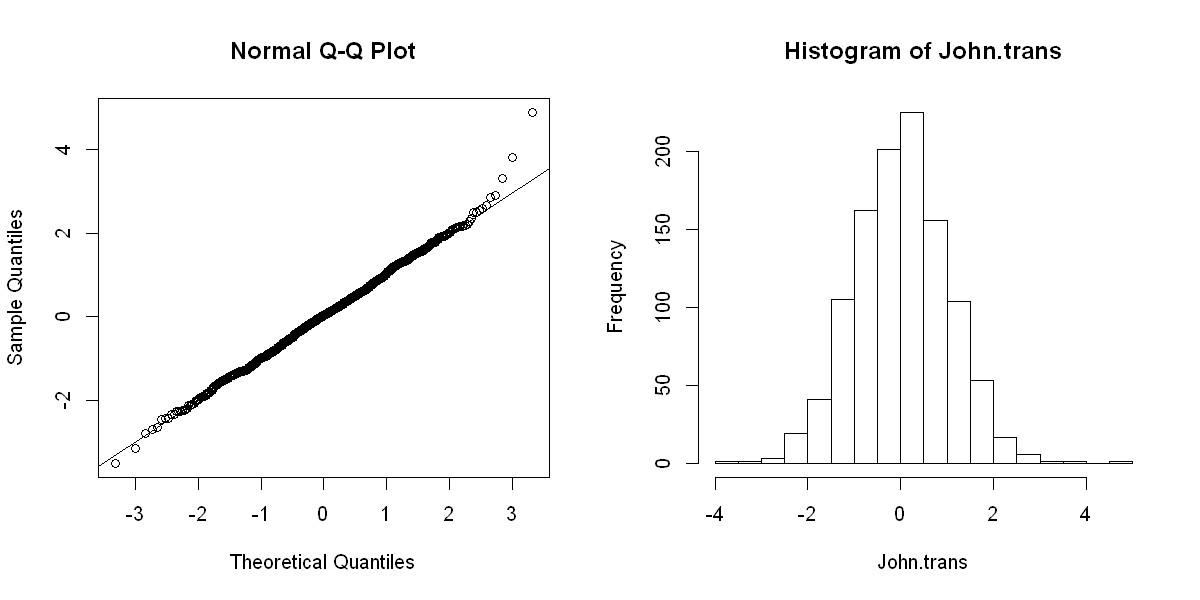

In [28]:
options(repr.plot.height = 5, repr.plot.width = 10)
par(mfrow=c(1,2))
qqnorm(John.trans)
qqline(John.trans)
hist(John.trans)

## References
 * Brockwell, P. R. Davis (2016). _An introduction to Time Series and Forecasting. 3th Edition. Springer_
 * The course MTH6139 Time Series Lecturer notes in Queen Mary University of London.